In [23]:
import astropy.table as apt
import asdf
from astropy.coordinates import SkyCoord
import astropy.units as u

In [57]:
t = apt.Table.read(
    "../../galstreams/galstreams/tracks/track.st.Jhelum-a.bonaca2019.ecsv"
)

In [58]:
t2 = apt.Table.read(
    "../../galstreams/galstreams/tracks/track.st.Jhelum-a.bonaca2019.summary.ecsv"
)

In [59]:
t2

StreamName,StreamShortName,InfoFlags,end_o.ra,end_o.dec,end_o.distance,end_o.pm_ra_cosdec,end_o.pm_dec,end_o.radial_velocity,end_f.ra,end_f.dec,end_f.distance,end_f.pm_ra_cosdec,end_f.pm_dec,end_f.radial_velocity,mid.ra,mid.dec,mid.distance,mid.pm_ra_cosdec,mid.pm_dec,mid.radial_velocity,pole.ra,pole.dec,pole.distance
,,,deg,deg,kpc,mas / yr,mas / yr,km / s,deg,deg,kpc,mas / yr,mas / yr,km / s,deg,deg,kpc,mas / yr,mas / yr,km / s,deg,deg,
str8,str5,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Jhelum-a,Jhe-a,1011,7.3041927575875105,-52.20136750320895,13.000000000000025,7.554340534354921,-2.8771769977912274,5.0524602779234026e-14,321.4696898792274,-46.23993557083222,13.000000000000032,4.998297459749316,-6.08186480260532,-3.368306851948935e-14,342.9753055045304,-51.37941814356959,13.000000000000007,6.594683222704745,-4.914239425983285,-2.3578147963642546e-13,178.37247005110487,-37.60347958737648,1.0


In [10]:
t.write("../data/GD-1.pricewhelan2018.asdf", data_key="track", format="asdf")

In [11]:
t2.write("../data/GD-1.pricewhelan2018.asdf", data_key="summary", format="asdf")

In [12]:
table_tree = {"track": t, "summary": t2};

In [13]:
a = asdf.AsdfFile(table_tree)
a.write_to("../data/GD-1.pricewhelan2018.asdf")

In [14]:
tt = apt.Table.read("../data/GD-1.pricewhelan2018.asdf", data_key="summary")

In [15]:
tt

StreamName,StreamShortName,InfoFlags,end_o.ra,end_o.dec,end_o.distance,end_o.pm_ra_cosdec,end_o.pm_dec,end_o.radial_velocity,end_f.ra,end_f.dec,end_f.distance,end_f.pm_ra_cosdec,end_f.pm_dec,end_f.radial_velocity,mid.ra,mid.dec,mid.distance,mid.pm_ra_cosdec,mid.pm_dec,mid.radial_velocity,pole.ra,pole.dec,pole.distance
,,,deg,deg,kpc,mas / yr,mas / yr,km / s,deg,deg,kpc,mas / yr,mas / yr,km / s,deg,deg,kpc,mas / yr,mas / yr,km / s,deg,deg,
str4,str4,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
GD-1,GD-1,1110,124.06463770068025,-7.970772979891113,5.508347580561896,-2.383498192121123,-7.8564837934212495,1.9209032938308283e-10,219.56222712541387,58.20526418569576,10.498741139627292,-8.445978981710363,-1.3661780519199789,2.2529341417616946e-10,200.48591243455303,58.311465160880104,9.999999999926288,-8.409965794914967,-3.975967581427862,1.3176816404824234e-10,34.59870000073543,29.733100003154735,1.0


In [24]:
sc_test = SkyCoord(0 * u.deg, 0 * u.deg)

In [25]:
type(sc) == type(sc_test)

NameError: name 'sc' is not defined

In [26]:
SkyCoord(tt["ra"], tt["dec"])

KeyError: 'ra'

In [40]:
isinstance(sc, SkyCoord)

True

In [27]:
import galstreams as gst
from matplotlib.path import Path as mpl_path
from astropy.table import Table
import asdf
import astropy.units as u
from astropy.coordinates import SkyCoord
from gala.coordinates import GreatCircleICRSFrame
import numpy as np

In [47]:
import sys

sys.path.append("../")
from cats.pawprint.pawprint import *

In [48]:
# load a pawprint from galstreams (sky only)
p = pawprintClass.pawprint_from_galstreams("Jhelum-a", "bonaca2019")

In [49]:
# need to make sure that the minimum and maximum of ra make sense and that the stream doesn't "wrap around"
p.skyprint

{'stream': {}, 'background': {}}

In [50]:
# Generate random points on the sphere in an area around the track
rao, raf = np.min(p.track.track.ra.deg), np.max(p.track.track.ra.deg)
deco, decf = np.min(p.track.track.dec.deg), np.max(p.track.track.dec.deg)
field_ra, field_dec = gst.get_random_spherical_angles(
    5000, az=[rao, raf], lat=[deco, decf], degree=True  # az is ra values
)  # lat is dec values
field = SkyCoord(ra=field_ra * u.deg, dec=field_dec * u.deg, frame="icrs")

# generate masks for the on- and off-stream sky footprints
on = p.skyprint["stream"].inside_footprint(field)
off = p.skyprint["background"].inside_footprint(field)

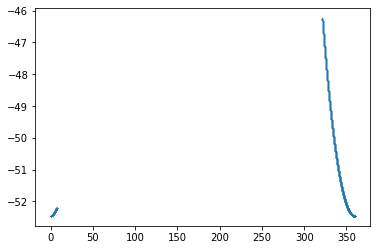

In [51]:
plt.scatter(p.track.track.ra.deg, p.track.track.dec.deg, s=0.1)

In [52]:
from matplotlib import pyplot as plt

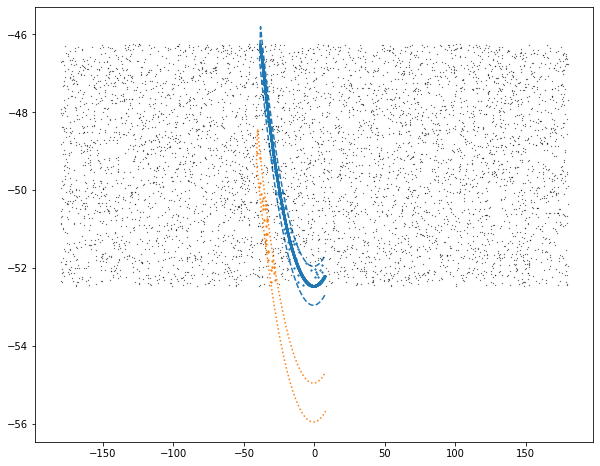

In [53]:
plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)

# plot the track
ax.plot(
    p.track.track.ra.wrap_at(180 * u.deg), p.track.track.dec, ".", ms=2.0, color="C0"
)

# plot the on-stream polygon
ax.plot(
    p.skyprint["stream"].edges.icrs.ra.wrap_at(180 * u.deg),
    p.skyprint["stream"].edges.icrs.dec,
    ls="--",
    color="C0",
)

# plot random background "field" points
ax.plot(field.ra.wrap_at(180 * u.deg), field.dec, "k.", ms=0.5)

# plot the field points inside the polygon footprint
ax.plot(field.ra[on].wrap_at(180 * u.deg), field.dec[on], ".", ms=2.5, color="C0")

# Plot the off-stream polygon footprint and points selected inside it
ax.plot(
    p.skyprint["background"].edges.icrs.ra.wrap_at(180 * u.deg),
    p.skyprint["background"].edges.icrs.dec,
    ls=":",
    color="C1",
)
ax.plot(field.ra[off].wrap_at(180 * u.deg), field.dec[off], ".", ms=2.5, color="C1")

(-10.0, 10.0)

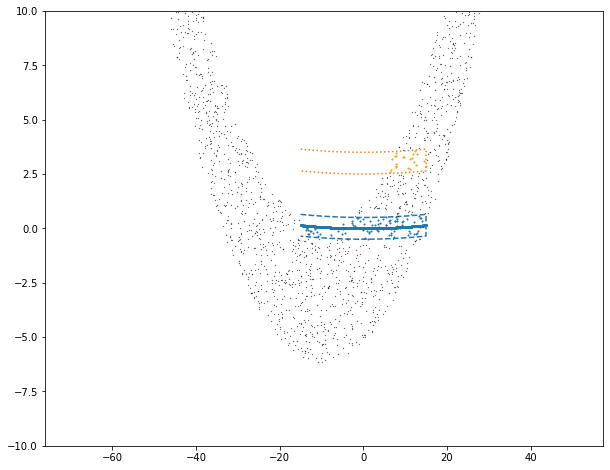

In [290]:
plt.figure(1, figsize=(10, 8))
ax = plt.subplot(111)

# Plot the track in phi1/phi2
ax.plot(
    p.track.track.transform_to(p.stream_frame).phi1,
    p.track.track.transform_to(p.stream_frame).phi2,
    ".",
    ms=2.0,
    color="C0",
)
# plot the on-stream polygon
ax.plot(
    p.skyprint["stream"].edges.transform_to(p.stream_frame).phi1,
    p.skyprint["stream"].edges.transform_to(p.stream_frame).phi2,
    ls="--",
    color="C0",
)
# plot the off-stream polygon
ax.plot(
    p.skyprint["background"].edges.transform_to(p.stream_frame).phi1,
    p.skyprint["background"].edges.transform_to(p.stream_frame).phi2,
    ls=":",
    color="C1",
)

ax.plot(
    field.transform_to(p.stream_frame).phi1,
    field.transform_to(p.stream_frame).phi2,
    ".k",
    ms=0.5,
)
ax.plot(
    field[on].transform_to(p.stream_frame).phi1,
    field[on].transform_to(p.stream_frame).phi2,
    ".",
    ms=2,
)
ax.plot(
    field[off].transform_to(p.stream_frame).phi1,
    field[off].transform_to(p.stream_frame).phi2,
    ".",
    color="orange",
    ms=2,
)

ax.set_ylim(-10, 10)

In [292]:
a = asdf.open("Jhelum-abonaca2019.asdf")

/opt/anaconda3/envs/cats/lib/python3.8/site-packages/asdf/schema.py:301: AsdfWarning: Unable to locate schema file for 'tag:astropy.org:astropy/coordinates/frames/greatcircleicrsframe-1.0.0': 'http://astropy.org/schemas/astropy/coordinates/frames/greatcircleicrsframe-1.0.0'
  warnings.warn(msg.format(tag, schema_uri), AsdfWarning)
/opt/anaconda3/envs/cats/lib/python3.8/site-packages/asdf/yamlutil.py:300: AsdfConversionWarning: tag:astropy.org:astropy/coordinates/frames/greatcircleicrsframe-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(


In [295]:
a["stream_name"]

'Jhelum-a'